In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
#C_60

# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_130221.txt' #QD_16
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_131312.txt' #QD_17 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_132234.txt' #QD_17 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_133514.txt' #QD_18
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_135834.txt' #QD_20
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_141643.txt' #QD_21
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_164047.txt' #QD_23 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_164648.txt' #QD_23 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_172516.txt' #QD_24 (1)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-05_172834.txt' #QD_24 (2)
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_143908.txt' #QD_27
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_145037.txt' #QD_28
file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-06_154014.txt' #QD_29

# file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-17_132552.txt' #QD_40
# file_name = 'C:/Users/HP/Downloads/Histogram_2025-03-10_160635.txt' #QD_49

In [3]:
# CQDs
file_name = 'C:/Users/HP/Downloads/Histogram_2025-02-19_144221.txt' #QD_55

In [2]:
file_name = r'\\server\groups\ding\PROJECTS\QKD_Perovskites\TimeTagger\20251215\Bidirectional_histogram_(2)_2025-12-15_113635.txt'

In [3]:
data = pd.read_csv(file_name, sep="\t")  # Read the file with tab as the delimiter

# Extract the columns
x = data["Time differences (ps)"] / 1000 # Time in ns
y = data["Counts per bin"]

In [4]:
def plot_lineal(x, y, fit_ini, width, height, font_size):

    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Linear Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_logarithmic(x, y, fit_ini, width, height, font_size):
    
    plt.figure(figsize=(width, height))  # Define el tamaño de la figura
    plt.plot(x - min(x), y, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5, label='Data')
    plt.plot(x[fit_ini::] - min(x), y[fit_ini::], marker='o', color='red', markersize=1, linestyle='-', linewidth=1, label='Fitting')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Histogram Plot (Logarithmic Scale)')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (log scale)', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True, which="both")  # Enable grid for both major and minor ticks
    plt.legend(fontsize=font_size)
    
    plt.show()


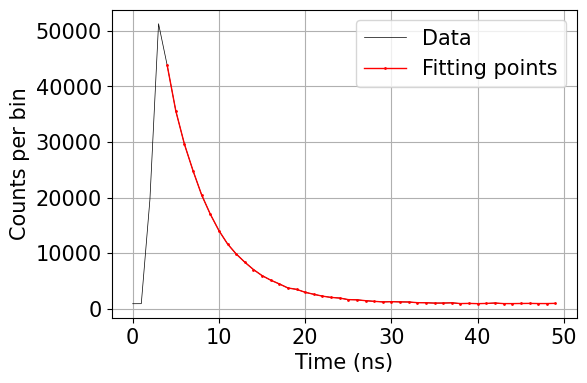

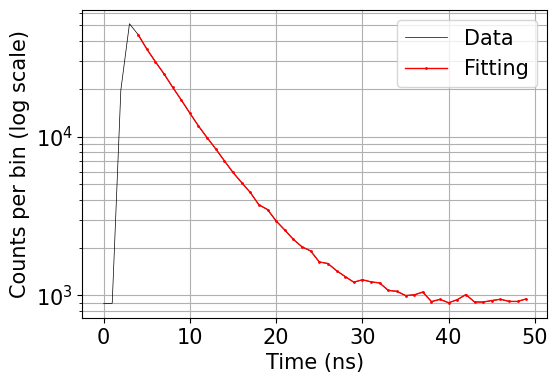

In [5]:
width = 6
height = 4
font_size = 15

x_ini = -50   # valor inicial en el eje x
x_end = -1    # valor final en el eje x
fit_ini = -46   # valor inicial del ajuste en x

# Crear máscara según valores de x
mask = (x >= x_ini) & (x <= x_end)

x_sel = x[mask]
y_sel = y[mask]

plot_lineal(x_sel, y_sel, fit_ini, width, height, font_size)
plot_logarithmic(x_sel, y_sel, fit_ini, width, height, font_size)

i_ini = np.argmin(np.abs(x - x_ini))
i_end = np.argmin(np.abs(x - x_end))


In [6]:
def exp_func_3(x, A, B_1, x_0_1, tau_1, B_2, x_0_2, tau_2, B_3, x_0_3, tau_3):
    return A + B_1 * np.exp(-(x - x_0_1) / tau_1) + B_2 * np.exp(-(x - x_0_2) / tau_2) + B_3 * np.exp(-(x - x_0_3) / tau_3)

def fit_exponential_3(x, y):
    
    initial_guess = [np.min(y), np.max(y)-np.min(y), np.min(x), 6.0, np.max(y)-np.min(y), np.min(x), 0.4, np.max(y)-np.min(y), np.min(x), 0.04]
    params, pcov = curve_fit(exp_func_3, x, y, p0=initial_guess)
    return params, pcov

def plot_fit_lineal_3(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_3(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y / 1000, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5)
    plt.plot(x_fit - min(x), y_fit / 1000, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (×10³)', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_fit_logarithmic_3(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_3(x_fit, *params)
    
    errors = np.sqrt(y)
    
    plt.figure(figsize=(width, height))
    
    plt.fill_between(x - min(x), y - errors, y + errors, color='#A0A0A0', alpha=1.0)
    plt.plot(x_fit - min(x), y_fit, marker='o', color='red', markersize=0, linestyle='-', linewidth=1, label='Fitted graph')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.grid(True)
    #plt.legend(fontsize=font_size)
    
    plt.show()

C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_15896\3994306049.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, pcov = curve_fit(exp_func_3, x, y, p0=initial_guess)


A: 5217.762 ± inf counts

B_1: 4559177485.969 ± inf counts
t_0_1: -533528.869 ± inf ns
tau_1: 2.210 ± inf ns

B_2: -1778860932.866 ± inf counts
t_0_2: 13786.964 ± inf ns
tau_2: -3.141 ± inf ns

B_3: 104867.030 ± inf counts
t_0_3: -96.856 ± inf ns
tau_3: 0.040 ± inf ns

tau_averaged: 5.633 ± inf ns


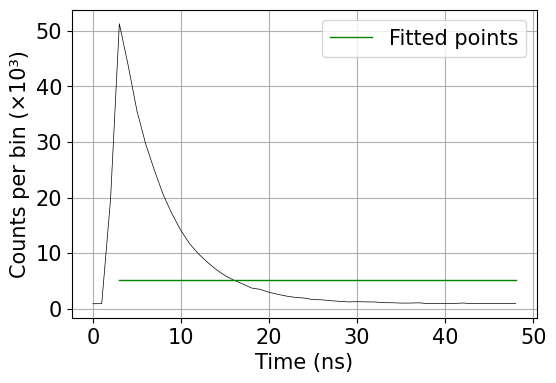

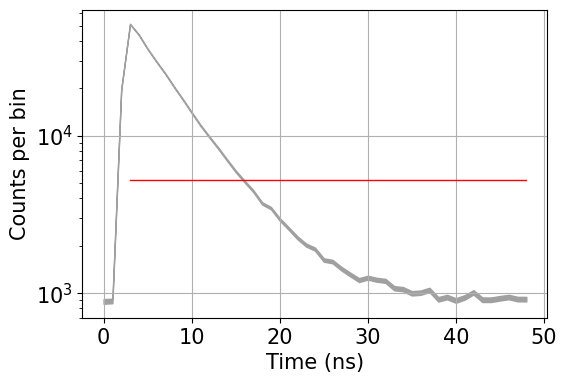

In [7]:
params, pcov = fit_exponential_3(x[(i_ini + fit_ini):i_end], y[(i_ini + fit_ini):i_end])

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"A: {params[0]:.3f} ± {perr[0]:.3f} counts\n")
print(f"B_1: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0_1: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau_1: {params[3]:.3f} ± {perr[3]:.3f} ns\n")
print(f"B_2: {params[4]:.3f} ± {perr[4]:.3f} counts")
print(f"t_0_2: {params[5]:.3f} ± {perr[5]:.3f} ns")
print(f"tau_2: {params[6]:.3f} ± {perr[6]:.3f} ns\n")
print(f"B_3: {params[7]:.3f} ± {perr[7]:.3f} counts")
print(f"t_0_3: {params[8]:.3f} ± {perr[8]:.3f} ns")
print(f"tau_3: {params[9]:.3f} ± {perr[9]:.3f} ns\n")

tau_averaged = (params[1]*params[3] + params[4]*params[6] + params[7]*params[9])/(params[1] + params[4] + params[7])
err_tau_averaged = np.sqrt(params[1]**2*perr[3]**2 + params[4]**2*perr[6]**2 + params[7]**2*perr[9]**2)/(params[1] + params[4] + params[7])

print(f"tau_averaged: {tau_averaged:.3f} ± {err_tau_averaged:.3f} ns")

plot_fit_lineal_3(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)
plot_fit_logarithmic_3(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)

A   = 0.000 ± 0.197
B1  = 13314.300 ± 14638956.176, tau1 = 13.636 ± 74972.384 ns
B2  = 14583.731 ± 14638956.205, tau2 = 13.636 ± 68438.150 ns


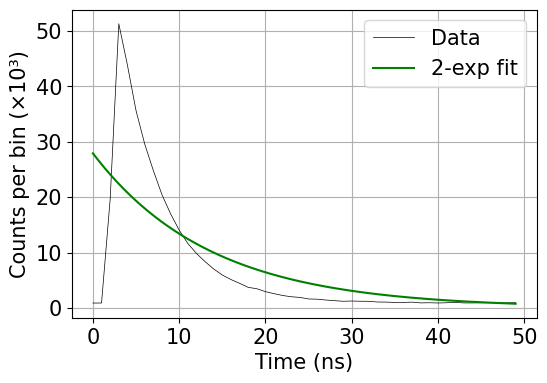

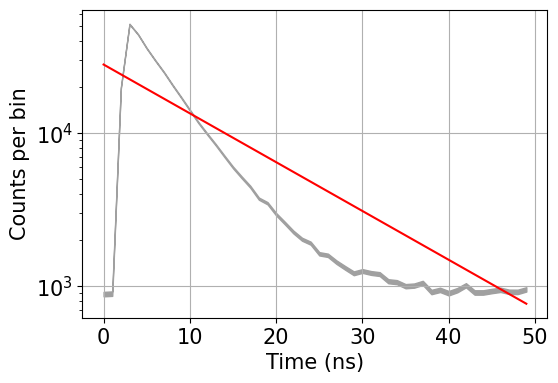

In [10]:
# --- Modelo de 2 exponenciales ---
def exp_func_2(x, A, B1, tau1, B2, tau2):
    return A + B1*np.exp(-x/tau1) + B2*np.exp(-x/tau2)

# --- Fit seguro ---
def fit_exp_2_safe(x_sel, y_sel):
    x0 = x_sel.min()
    xs = x_sel - x0
    # Escalado para mejorar convergencia
    xs_scaled = xs / (xs.max() + 1e-9)
    ys_scaled = y_sel / (y_sel.max() + 1e-9)
    
    # Initial guess
    A0 = np.min(ys_scaled)
    B1_0 = (np.max(ys_scaled)-A0)/2
    B2_0 = (np.max(ys_scaled)-A0)/2
    tau1_0 = 0.2
    tau2_0 = 0.5
    p0 = [A0, B1_0, tau1_0, B2_0, tau2_0]
    
    # Bounds realistas (tau en escala 0-1)
    bounds = ([0, 0, 0.01, 0, 0.01], [1.5, 1.5, 1.0, 1.5, 1.0])
    
    params_scaled, pcov = curve_fit(exp_func_2, xs_scaled, ys_scaled, p0=p0, bounds=bounds, maxfev=10000)
    
    # Desescalar taus y amplitudes
    params = params_scaled.copy()
    params[2] *= xs.max()
    params[4] *= xs.max()
    params[1] *= y_sel.max()
    params[3] *= y_sel.max()
    params[0] *= y_sel.max()
    
    return params, pcov, x0, xs.max(), y_sel.max()

# --- Plot lineal ---
def plot_fit_lineal_2_safe(x, y, x_ini, x_end, x_sel, params, x0, w, h, fs):
    mask = (x>=x_ini) & (x<=x_end)
    xp, yp = x[mask]-x0, y[mask]
    xf = np.linspace(x_sel.min(), x_sel.max(), 1000) - x0
    yf = exp_func_2(xf, *params)
    plt.figure(figsize=(w,h))
    plt.plot(xp, yp/1000, 'k-', lw=0.5, label='Data')
    plt.plot(xf, yf/1000, 'g-', lw=1.5, label='2-exp fit')
    plt.xticks(fontsize=fs); plt.yticks(fontsize=fs)
    plt.xlabel('Time (ns)', fontsize=fs)
    plt.ylabel('Counts per bin (×10³)', fontsize=fs)
    plt.grid(True); plt.legend(fontsize=fs); plt.show()

# --- Plot logarítmico ---
def plot_fit_log_2_safe(x, y, x_ini, x_end, x_sel, params, x0, w, h, fs):
    mask = (x>=x_ini) & (x<=x_end)
    xp, yp = x[mask]-x0, y[mask]
    err = np.sqrt(yp)
    xf = np.linspace(x_sel.min(), x_sel.max(), 1000) - x0
    yf = exp_func_2(xf, *params)
    plt.figure(figsize=(w,h))
    plt.fill_between(xp, yp-err, yp+err, color='#A0A0A0')
    plt.plot(xf, yf, 'r-', lw=1.5, label='2-exp fit')
    plt.xticks(fontsize=fs); plt.yticks(fontsize=fs)
    plt.xlabel('Time (ns)', fontsize=fs)
    plt.ylabel('Counts per bin', fontsize=fs)
    plt.yscale('log'); plt.grid(True); plt.show()

# --- Uso seguro ---
params, pcov, x0, xs_max, ys_max = fit_exp_2_safe(x_sel, y_sel)
perr = np.sqrt(np.diag(pcov))

print(f"A   = {params[0]:.3f} ± {perr[0]:.3f}")
print(f"B1  = {params[1]:.3f} ± {perr[1]:.3f}, tau1 = {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"B2  = {params[3]:.3f} ± {perr[3]:.3f}, tau2 = {params[4]:.3f} ± {perr[4]:.3f} ns")

plot_fit_lineal_2_safe(x, y, x_ini, x_end, x_sel, params, x0, width, height, font_size)
plot_fit_log_2_safe(x, y, x_ini, x_end, x_sel, params, x0, width, height, font_size)

In [40]:
def exp_func_2(x, A, B_1, x_0_1, tau_1, B_2, x_0_2, tau_2):
    return A + B_1 * np.exp(-(x - x_0_1) / tau_1) + B_2 * np.exp(-(x - x_0_2) / tau_2) 

def fit_exponential_2(x, y):
    
    params, pcov = curve_fit(exp_func_2, x, y, p0=[np.min(y), np.max(y)-np.min(y), np.min(x), 6.0, np.max(y)-np.min(y), np.min(x), 0.4])
    return params, pcov

def plot_fit_lineal_2(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_2(x_fit, *params)
    
    plt.figure(figsize=(width, height))
    plt.plot(x - min(x), y / 1000, marker='o', color='black', markersize=0, linestyle='-', linewidth=0.5)
    plt.plot(x_fit - min(x), y_fit / 1000, marker='o', color='green', markersize=0, linestyle='-', linewidth=1, label='Fitted points')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts per bin (×10³)', fontsize=font_size)
    plt.grid(True)
    plt.legend(fontsize=font_size)
    
    plt.show()
    
def plot_fit_logarithmic_2(x, y, fit_ini, params, width, height, font_size):
    
    x_fit = np.linspace(min(x[fit_ini::]), max(x[fit_ini::]), 1000)
    y_fit = exp_func_2(x_fit, *params)
    
    errors = np.sqrt(y)
    
    plt.figure(figsize=(width, height))
    
    plt.fill_between(x - min(x), y - errors, y + errors, color="#0004FF", alpha=0.2)
    plt.plot(x_fit - min(x), y_fit, marker='o', color="#0004FF", markersize=0, linestyle='-', linewidth=1, label='Fitted graph')
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # plt.title('Exponential Fit')
    plt.xlabel('Time (ns)', fontsize=font_size)
    plt.ylabel('Counts (a.u.)', fontsize=font_size)
    plt.yscale('log')  # Set Y-axis to logarithmic scale
    plt.yticks([])
    plt.grid(True, which='both', axis='both', linestyle='-', linewidth=0.3) 
    #plt.legend(fontsize=font_size)
    
    plt.show()

In [41]:
params, pcov = fit_exponential_2(x[(i_ini + fit_ini):i_end], y[(i_ini + fit_ini):i_end])

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"A: {params[0]:.3f} ± {perr[0]:.3f} counts\n")
print(f"B_1: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0_1: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau_1: {params[3]:.3f} ± {perr[3]:.3f} ns\n")
print(f"B_2: {params[4]:.3f} ± {perr[4]:.3f} counts")
print(f"t_0_2: {params[5]:.3f} ± {perr[5]:.3f} ns")
print(f"tau_2: {params[6]:.3f} ± {perr[6]:.3f} ns")

plot_fit_lineal_2(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)
plot_fit_logarithmic_2(x[i_ini:i_end], y[i_ini:i_end], fit_ini, params, width, height, font_size)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.